<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/Rental-Property-Prices-Predicting/blob/main/Rental__Property_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

# **Title**        : *Smart Predictive Modeling for Rental Property Prices (Regression Dataset)*
# **Technologies** : *Cleansing, EDA, Visualization, ML*
# **Domain**       : *Real Estate & Property Management*

**In this project wanna go to predict the Cars Price from the given dataset.**

In [407]:
# Import the necessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy import stats
import time
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBRegressor

In [380]:
# read the dataset
df_train= pd.read_excel('House_Rent_Train.xlsx')
df_test= pd.read_excel('House_Rent_Test.xlsx')

## **Data Cleaning and Exploration**

In [381]:
# Display the DataFrame
df_train.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [382]:
# Display basic information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [383]:
# check whether null values in the train data
df_train.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [384]:
# check whether null values in the test data
df_test.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [385]:
# check how many number of unique values in df_train data
df_train.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

In [386]:
# drop 'id' column
df_train = df_train.drop(columns=['id', 'activation_date'], axis=1)

In [387]:
df_train

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,NaN,NaN,NaN,NaN,NaN,1,1,1,1,SEMI_FURNISHED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,BHK2,NaN,NaN,NaN,NaN,0,0,0,1,SEMI_FURNISHED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,BHK2,NaN,NaN,NaN,NaN,1,1,0,1,SEMI_FURNISHED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,BHK2,NaN,NaN,NaN,NaN,0,1,0,0,SEMI_FURNISHED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Predict "locality" column null values**

## **Drop Null values rows for all columns except the 'locality' column**

In [388]:
# all columns null dropped then we loss only 39 rows only it will not affect our model

drop_columns= ['type','latitude','longitude','lease_type','property_age','bathroom','facing',
              'cup_board','floor','total_floor','amenities','water_supply','building_type','balconies','rent']
df_train.dropna(subset=drop_columns, inplace=True)
df_train

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [389]:
df_train.isnull().sum()

type               0
locality         137
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [390]:

locality_predict = df_train.copy()

locality_predict

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [391]:
df_train

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,12.982870,80.262012,FAMILY,0,1,0,0,SEMI_FURNISHED,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,BHK1,Ulsoor,12.979762,77.615395,ANYONE,0,1,0,1,SEMI_FURNISHED,...,2.0,E,1.0,1.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,1.0,20000.0
20528,BHK2,Koramangala 4th Block,12.931072,77.632361,ANYONE,0,0,0,1,SEMI_FURNISHED,...,2.0,N,2.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IH,2.0,30000.0
20529,BHK2,Kumaraswamy Layout,12.901800,77.566597,FAMILY,1,1,0,1,SEMI_FURNISHED,...,2.0,W,2.0,5.0,5.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,2.0,16000.0
20530,BHK2,Indiranagar,12.965502,77.647694,FAMILY,0,1,0,0,SEMI_FURNISHED,...,2.0,E,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",CORP_BORE,AP,3.0,30000.0


In [392]:
col= df_train.select_dtypes(include=['object']).columns.tolist()
col

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

## **Apply Label encoding for Train model**

In [393]:
# Apply Label encoding

le= LabelEncoder()
categorical= ['type','locality','lease_type','furnishing','parking','facing',
              'amenities','water_supply','building_type']      # object columns

# for training
le= LabelEncoder()
for col in categorical:
  le.fit(locality_predict[col])
  locality_predict[col]= le.transform(locality_predict[col])

# Display the DataFrame after Label encoding
locality_predict

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,2,1917,12.934471,77.634471,3,1,1,1,0,2,...,2.0,0,2.0,6.0,12.0,4553,2,0,2.0,40000.0
1,2,376,12.929557,77.672280,0,0,1,0,1,2,...,2.0,2,2.0,3.0,4.0,1520,1,0,2.0,22000.0
2,3,1687,12.982870,80.262012,3,0,1,0,0,2,...,3.0,0,3.0,1.0,5.0,1618,2,0,3.0,28000.0
3,1,228,12.955991,77.531634,3,0,0,0,1,2,...,1.0,0,1.0,1.0,2.0,226,1,3,0.0,8000.0
4,3,1058,12.963903,77.649446,3,0,0,0,1,2,...,3.0,0,4.0,0.0,0.0,455,1,3,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20524,1,1722,12.979762,77.615395,0,0,1,0,1,2,...,2.0,0,1.0,1.0,4.0,2239,2,0,1.0,20000.0
20528,2,1080,12.931072,77.632361,0,0,0,0,1,2,...,2.0,1,2.0,1.0,2.0,731,1,3,2.0,30000.0
20529,2,1117,12.901800,77.566597,3,1,1,0,1,2,...,2.0,7,2.0,5.0,5.0,4037,0,0,2.0,16000.0
20530,2,813,12.965502,77.647694,3,0,1,0,0,2,...,2.0,0,2.0,2.0,4.0,2365,2,0,3.0,30000.0


In [394]:
# drop the low varience columns from the Training dataset
locality_predict.drop(['water_supply', 'lift', 'lease_type', 'negotiable', 'swimming_pool', 'gym', 'amenities'],axis=1, inplace=True)

In [395]:
# seperate the all null values rows in 'locality' column
df_predict_test= df_train[df_train['locality'].isnull()].drop(['locality'],axis=1)
df_predict_test

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
68,RK1,12.916572,77.653858,ANYONE,0,0,0,1,FULLY_FURNISHED,BOTH,...,1.0,E,1.0,4.0,4.0,"{""PARK"":false,""HK"":false,""LIFT"":false,""PB"":fal...",CORP_BORE,AP,0.0,10000.0
126,BHK3,12.988281,77.698081,ANYONE,1,1,0,1,SEMI_FURNISHED,BOTH,...,3.0,SE,6.0,3.0,4.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",CORP_BORE,AP,3.0,30000.0
530,BHK2,12.904404,77.570353,ANYONE,0,0,0,0,SEMI_FURNISHED,FOUR_WHEELER,...,1.0,NE,1.0,3.0,3.0,"{""HK"":false,""PARK"":false,""LIFT"":false,""PB"":tru...",CORP_BORE,IF,1.0,12000.0
604,BHK1,12.926315,77.596777,FAMILY,0,0,0,1,NOT_FURNISHED,FOUR_WHEELER,...,1.0,S,1.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20393,BHK2,12.968302,77.527154,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,1.0,N,2.0,1.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IF,0.0,11000.0
20394,BHK2,12.969651,77.658173,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,...,3.0,N,2.0,2.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":true,""AC"":...",BOREWELL,AP,3.0,30000.0
20433,BHK1,12.920966,77.607557,ANYONE,0,0,0,1,SEMI_FURNISHED,NONE,...,1.0,N,1.0,2.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1.0,12500.0
20434,BHK4,12.920497,77.560153,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,...,3.0,N,3.0,0.0,1.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IH,0.0,25000.0


## **Apply Label Encoding for test model**

In [396]:
# Apply Label encoding
categorical= ['type','lease_type','furnishing','parking','facing',
              'amenities','water_supply','building_type']      # object columns

# for training
le= LabelEncoder()
for col in categorical:
  le.fit(df_predict_test[col])
  df_predict_test[col]= le.transform(df_predict_test[col])

# Display the DataFrame after Label encoding
df_predict_test

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,1,12.934471,77.634471,2,1,1,1,0,2,0,...,2.0,0,2.0,6.0,12.0,86,2,0,2.0,40000.0
68,5,12.916572,77.653858,0,0,0,0,1,0,0,...,1.0,0,1.0,4.0,4.0,95,2,0,0.0,10000.0
126,2,12.988281,77.698081,0,1,1,0,1,2,0,...,3.0,4,6.0,3.0,4.0,62,2,0,3.0,30000.0
530,1,12.904404,77.570353,0,0,0,0,0,2,1,...,1.0,2,1.0,3.0,3.0,2,2,1,1.0,12000.0
604,0,12.926315,77.596777,2,0,0,0,1,1,1,...,1.0,3,1.0,0.0,0.0,16,1,2,0.0,14000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20393,1,12.968302,77.527154,2,0,0,0,1,2,3,...,1.0,1,2.0,1.0,1.0,7,1,1,0.0,11000.0
20394,1,12.969651,77.658173,0,0,1,0,1,2,0,...,3.0,1,2.0,2.0,4.0,52,0,0,3.0,30000.0
20433,0,12.920966,77.607557,0,0,0,0,1,2,2,...,1.0,1,1.0,2.0,2.0,26,1,1,1.0,12500.0
20434,3,12.920497,77.560153,2,0,0,0,1,2,3,...,3.0,1,3.0,0.0,1.0,33,2,2,0.0,25000.0


In [397]:
# drop the low varience columns from the test dataset
df_predict_test.drop(['water_supply', 'lift', 'lease_type', 'negotiable', 'swimming_pool', 'gym', 'amenities'],axis=1, inplace=True)

In [398]:
# Predict the locality column null values

X= locality_predict.drop('locality', axis=1)
ss= StandardScaler()
y= locality_predict['locality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [399]:
models = [('Linear Regresion', LinearRegression()),
          ('Gradient Boosting', GradientBoostingRegressor()),
          ('Random Forest', RandomForestRegressor())]
X_train= ss.fit_transform(X_train)
X_test= ss.fit_transform(X_test)
for model in models: #for loop through the three models
    reg = model[1]  #initialize the model object
    reg.fit(X_train,y_train)  #fitting the training data
    pred = reg.predict(X_test)  #predict target
    print(model[0])
    print('R2: ',r2_score(y_test, pred))  #check r2 score
    print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))  #check root mean squared error
    print('-'*30)

Linear Regresion
R2:  0.06484882548420978
RMSE:  506.61355220148727
------------------------------
Gradient Boosting
R2:  0.27127367116665735
RMSE:  447.2168124373912
------------------------------
Random Forest
R2:  0.4252138031573368
RMSE:  397.18154106119397
------------------------------


In [400]:
df_predict_test.columns

Index(['type', 'latitude', 'longitude', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [401]:
# Predicted Values replace to locality column

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)


# in df_predict_test  having 3 features so we have to remove locality column
X= ss.fit_transform(df_predict_test)
fill= rfr.predict(X)
df_predict_test['locality'] = fill  #filling the null values

In [402]:
locality_predict = pd.concat([locality_predict.dropna(), df_predict_test]).reset_index(drop=True)

In [403]:
locality_predict

,type,locality,latitude,longitude,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,building_type,balconies,rent
0,2,1917.00,12.934471,77.634471,2,0,1250,25.0,2.0,0,2.0,6.0,12.0,0,2.0,40000.0
1,2,376.00,12.929557,77.672280,2,0,1400,4.0,2.0,2,2.0,3.0,4.0,0,2.0,22000.0
2,3,1687.00,12.982870,80.262012,2,0,1350,6.0,3.0,0,3.0,1.0,5.0,0,3.0,28000.0
3,1,228.00,12.955991,77.531634,2,3,600,3.0,1.0,0,1.0,1.0,2.0,3,0.0,8000.0
4,3,1058.00,12.963903,77.649446,2,0,1500,15.0,3.0,0,4.0,0.0,0.0,3,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20646,1,1100.08,12.968302,77.527154,2,3,600,3.0,1.0,1,2.0,1.0,1.0,1,0.0,11000.0
20647,1,1269.20,12.969651,77.658173,2,0,1517,2.0,3.0,1,2.0,2.0,4.0,0,3.0,30000.0
20648,0,830.39,12.920966,77.607557,2,2,415,0.0,1.0,1,1.0,2.0,2.0,1,1.0,12500.0
20649,3,1397.37,12.920497,77.560153,2,3,2000,10.0,3.0,1,3.0,0.0,1.0,2,0.0,25000.0


# **Feature Selection**

In [404]:
X= locality_predict.iloc[:,:-1]
ss= StandardScaler()
standard= ss.fit_transform(X)
pca= PCA(n_components=12)
pca_feature= pca.fit_transform(standard)
pca_feature

array([[ 2.46203429, -0.74325756,  0.07592811, ...,  2.05164966,
        -0.22494792, -0.18224166],
       [ 1.46653688,  0.18439875, -1.0455501 , ..., -0.3105481 ,
        -0.19470836,  0.08173504],
       [ 6.49663343, -5.74252484,  9.57197817, ..., 10.8137165 ,
         0.72562713,  2.3972144 ],
       ...,
       [-1.61045595, -1.72316064, -1.13894956, ..., -0.19565912,
         0.24561549,  0.42616965],
       [-0.71383926,  2.43263403,  0.30167404, ...,  1.0424612 ,
         1.27127283,  0.09358038],
       [ 0.60174536, -1.04928222,  1.509107  , ..., -0.15479219,
        -0.10371858, -0.70014697]])

In [405]:
np.cumsum(pca.explained_variance_*100)

array([ 353.54565861,  509.97232934,  641.39911981,  747.5963469 ,
        847.61633442,  946.02003512, 1034.93841144, 1120.83033737,
       1204.1847037 , 1273.03010266, 1340.28813366, 1394.90460003])

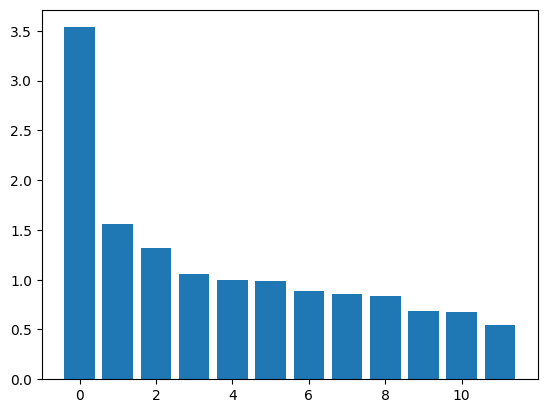

In [406]:
plt.bar(range(12), pca.explained_variance_)
plt.show()

## **select features using RandomForestRegressor**

In [408]:

# Assuming df is your DataFrame with the columns mentioned
X = locality_predict.drop('rent',axis=1)

y = locality_predict['rent']

# Create a Random Forest Regressor model
rfr = RandomForestRegressor()

# Fit the model to your data
rfr.fit(X, y)

# Get feature importances
feature_importances = rfr.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select features above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.015]['Feature'].tolist()

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['property_size', 'longitude', 'latitude', 'total_floor', 'bathroom', 'locality', 'property_age', 'type']


## **Drop the low varience Columns**

In [ ]:
# drop the low varience columns from the dataset
locality_predict.drop(['water_supply', 'lift', 'lease_type', 'negotiable', 'swimming_pool', 'gym', 'amenities'],axis=1, inplace=True)


#**Model Training and Evaluvation**

#**Predict the Cars Price applying most commonly using Regression Moduls**

# **LinearRegression**

In [409]:
# split the data train and test
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=7)
ss=StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [410]:
# LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
predicted_y_train= lr.predict(X_train)
predicted_y_test= lr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

27643029.55692283
25854180.89684692


In [411]:
print('LinearRegression')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

LinearRegression
mean_absolute_error_train : 3827.9983364251007
mean_absolute_error_test : 3698.225323001578
--------------------------------------------------
mean_squared_error_train : 27643029.55692283
mean_squared_error_test : 25854180.89684692
--------------------------------------------------
r2_score_train : 0.6107469595482158
r2_score_test : 0.6388200328149818


# **XGBRegressor**

In [412]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
predicted_y_train= xgb.predict(X_train)
predicted_y_test= xgb.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

5876038.225438607
12807142.692195185


In [413]:
print('XGBRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

XGBRegressor
mean_absolute_error_train : 1782.4787806032934
mean_absolute_error_test : 2522.8853021315585
--------------------------------------------------
mean_squared_error_train : 5876038.225438607
mean_squared_error_test : 12807142.692195185
--------------------------------------------------
r2_score_train : 0.9172570524387379
r2_score_test : 0.821085672922439


# **DecisionTreeRegressor**

In [414]:
# DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)
predicted_y_train= dtr.predict(X_train)
predicted_y_test= dtr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

121.06537530266344
26483363.039941903


In [351]:
print('DecisionTreeRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

DecisionTreeRegressor
mean_absolute_error_train : 1.6747376916868444
mean_absolute_error_test : 3530.7283143710156
--------------------------------------------------
mean_squared_error_train : 3399.9192897497987
mean_squared_error_test : 26277662.132547945
--------------------------------------------------
r2_score_train : 0.9999521243169783
r2_score_test : 0.6329040481073549


# **RandomForestRegressor**

In [415]:
# RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)
predicted_y_train= rfr.predict(X_train)
predicted_y_test= rfr.predict(X_test)
print(mean_squared_error(y_train, predicted_y_train))
print(mean_squared_error(y_test, predicted_y_test))

1997630.7591045469
12652991.081538824


In [416]:
print('RandomForestRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

RandomForestRegressor
mean_absolute_error_train : 979.6218926553672
mean_absolute_error_test : 2518.7719317356577
--------------------------------------------------
mean_squared_error_train : 1997630.7591045469
mean_squared_error_test : 12652991.081538824
--------------------------------------------------
r2_score_train : 0.9718705272488226
r2_score_test : 0.8232391533943408


# **GradientBoostingRegressor**

In [417]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predicted_y_train= gbr.predict(X_train)
predicted_y_test= gbr.predict(X_test)
print('GradientBoostingRegressor')
print('mean_absolute_error_train :',mean_absolute_error(y_train, predicted_y_train))
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)
print('mean_squared_error_train :',mean_squared_error(y_train, predicted_y_train))
print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)
print('r2_score_train :',r2_score(y_train, predicted_y_train))
print('r2_score_test :',r2_score(y_test, predicted_y_test))

GradientBoostingRegressor
mean_absolute_error_train : 2746.0851299664378
mean_absolute_error_test : 2788.078038737286
--------------------------------------------------
mean_squared_error_train : 14468395.244123165
mean_squared_error_test : 14470056.120032024
--------------------------------------------------
r2_score_train : 0.7962644858576057
r2_score_test : 0.7978549614296264


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rfr = grid_search.best_estimator_

# Evaluate the model
predicted_y_test = best_rfr.predict(X_test)
print('GridSearchCV')
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)

print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)

print('r2_score_test :',r2_score(y_test, predicted_y_test))

In [426]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   int64  
 1   type             4500 non-null   int64  
 2   locality         4500 non-null   int64  
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   int64  
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   int64  
 12  parking          4500 non-null   int64  
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   int64  
 17  cup_board     

In [427]:
# Apply Label encoding
categorical= ['id','locality']      # object columns

# for training
le= LabelEncoder()
for col in categorical:
  le.fit(df_test[col])
  df_test[col]= le.transform(df_test[col])

# Display the DataFrame after Label encoding
df_test
# drop the low varience columns from the test dataset
df_test.drop(['id','water_supply', 'lift','activation_date', 'lease_type', 'negotiable', 'swimming_pool', 'gym', 'amenities'],axis=1, inplace=True)

In [ ]:
param= {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}

# Instantiate RandomizedSearchCV
rscv= RandomizedSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the RandomizedSearchCV to the data
rscv.fit(X_train, y_train)


# Evaluate the model
predicted_y_test = rscv.predict(df_test)
print('RandomizedSearchCV')
print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)

print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)

print('r2_score_test :',r2_score(y_test, predicted_y_test))


## **Predict Model For Test Dataset**

# **Final Model**

In [ ]:
# RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)

predicted_y_test= rfr.predict(df_test)

print(mean_squared_error(y_test, predicted_y_test))

print('RandomForestRegressor')

print('mean_absolute_error_test :',mean_absolute_error(y_test, predicted_y_test))
print('-'*50)

print('mean_squared_error_test :',mean_squared_error(y_test, predicted_y_test))
print('-'*50)

print('r2_score_test :',r2_score(y_test, predicted_y_test))